<a href="https://colab.research.google.com/github/zerobbang/study_colab/blob/main/hongong/ch6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석 PCA

- 차원축소의 개념 ( 일부 특성을 선택하여 데이터 크기 줄임)
- PCA 개념
- 과일 사진
  - 10,000개의 픽셀( 높이 x 너비)
  - 10,000개의 특성이 있다.
  - 10,000개의 차원이 있다.
- 정형 데이터
  - 문자열 데이터, 수치형 데이터(연속형 데이터, 비연속형 데이터)
  - RAM이 감달할 수 없을 만큼 큰 데이터들도 많음
- 과대적합 방지 & 성능 향상
- 양적 데이터 사이의 분산-공분산 관계를 이용해서 선형결합으로 표시되는 주성분을 찾는다.
- 2 ~ 3 개의 주성분으로 전체 변동을 찾는다.
- 전부의 데이터를 다 안 쓰더라도 분류가 잘 된다.

## PCA 클래스

- 데이터 준비

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.py

--2022-03-31 07:20:48--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 07:20:48--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 07:20:49--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('fruits_300.py')
fruits_2d = fruits.reshape(-1,100*100)

- sklearn.decomposition 

In [3]:
fruits_2d.shape

(300, 10000)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


-- PCA 50개 성분으로 300 * 10000 픽셀값 압축

- 시각화 함수

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

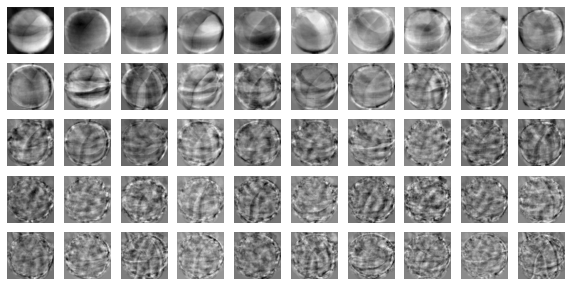

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))

-- 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.

-- 주성분을 찾았기 때문에 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.

- 특성 개수 줄이기

In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


-- 데이터의 원래 크기 대비해서 1/200로 줄임 = 용량이 줄었다.


## 원본 데이터 재구성

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


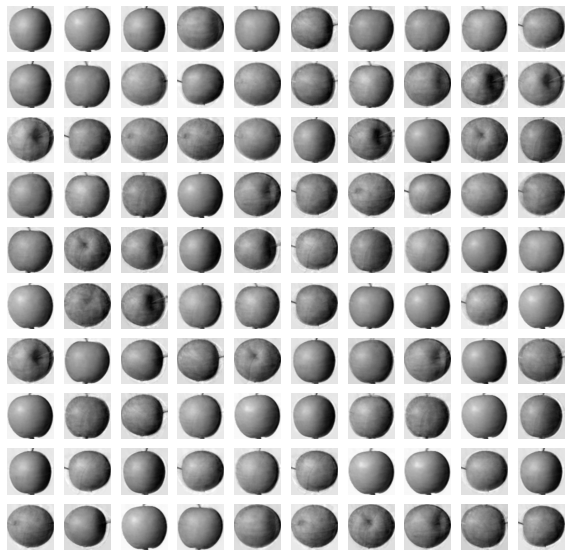

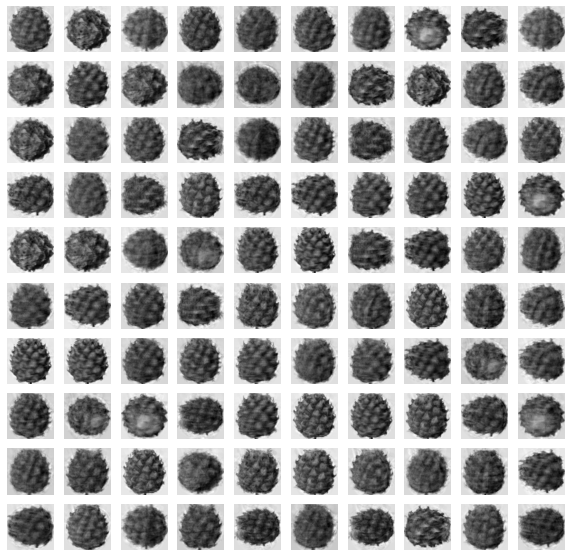

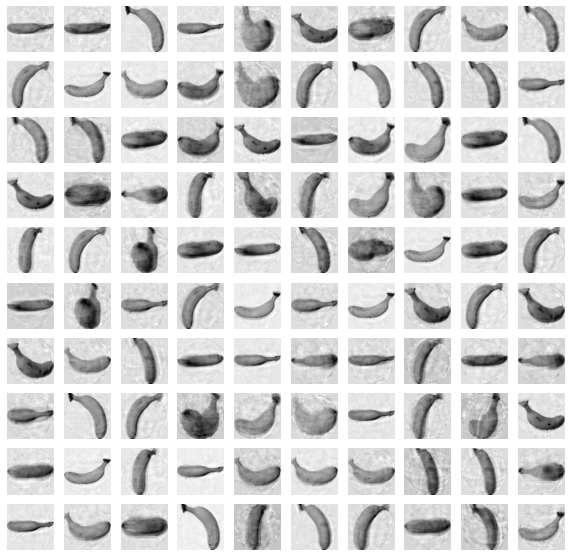

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산


  - 주성분이 원본 데이터의 분산을 얼마나 잘 나태내는지 기록한 값
  - 처음 10개의 주성분이 대부분의 분산을 표현.
  - 11개 ~ 50개까지는 설명이 잘 된다.
  - 50개의 특성으로 압축하였지만 처음 10개 주성분만으로도 충분하다.

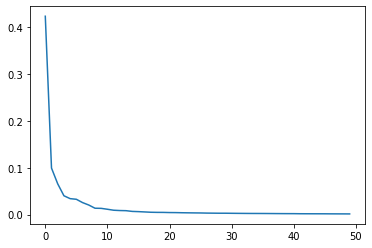

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9214087414526251


-- 92%가 넘는 분산을 유지하고 있다.
-- 그래프를 통해서 적절한 주성분의 개수를 찾는데 도움이 된다.

## 지도 학습 알고리즘과 함께 예측하기

pca는 분류를 수행한 것이 아니라 데이터 크기를 압축.(독립변수 종류 줄여줌) -> 다른 알고림즘과 함께 사용하여 예측 수행한다.


#### 로지스틱 회귀

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [14]:
target = np.array([0]*100 + [1]*100 + [2]*100)

- 교차검증진행
  - PCA 전 데이터

In [23]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.290068244934082


- 교차검증진행
  - PCA 후 데이터

In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.039120960235595706


-- 정확도도 올라갔지만 그것 보다 시간이 엄청 짧아졌다가 포인트

#### 주성분의 매개변수 개수대신 분산비율 지정하면?

- PCA는 지정된 분산 비율에 도달할 때까지 자동으로 주성분 찾기를 수행

In [17]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


--2개의 특성만으로 원본 데이터의 있는 분산의 50퍼를 표현할 수 있다.

- 분산 50퍼인 PCA를 이용해 과일 데이터 변환

In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


-- 위 모델로 원본 데이터를 변환 즉, 주성분이 2개인 모델로 원본데이터를 변환했기 때문에 변환된 데이터의 크기가 (300,2)이다.

- 교차검증

In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.0499237060546875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


-- 2개의 특성만으로도 99% 정확도 달성

- 차원 축소 데이터를 k평균 알고리즘에 추가

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")


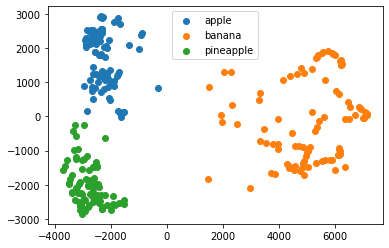

In [22]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])

plt.legend(['apple','banana','pineapple'])
plt.show()

-- PCA가 2개의 특(주성분)이 있기 때문에 2차원으로 표현이 가능하다.

-- 사과와 파인애플 클러스터의 경계가 가깝기 때문에 혼동을 일으키기 쉽다.